## 1. Project Overview
#### The objective of this project is to develop a model to forecast sales using machine learning techniques. We will use Linear Regression, Random Forest, and Gradient Boosting models to predict future sales based on historical data. We will then evaluate and visualize the performance of each model.

## 2. Data Preparation

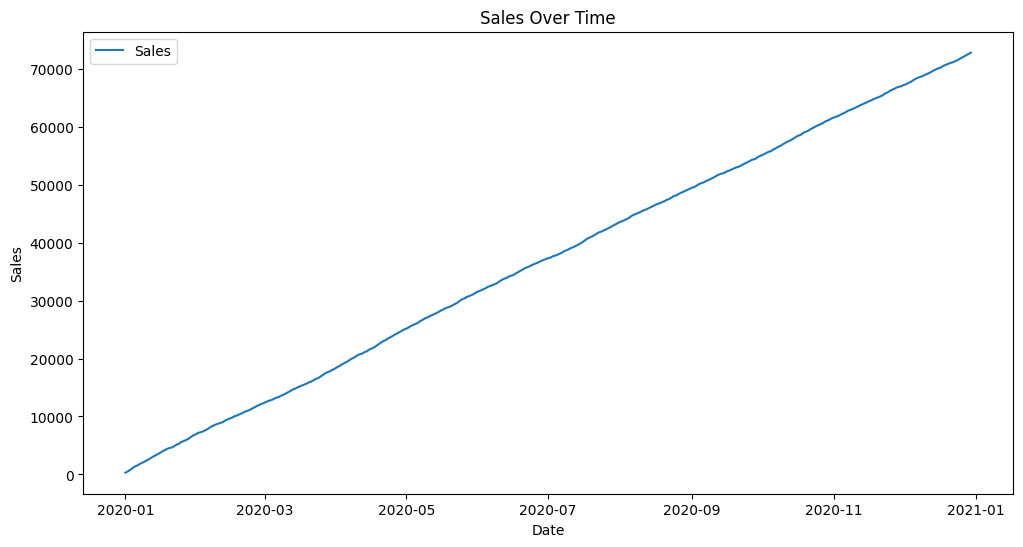

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
data = pd.read_csv('sales_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(data['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Feature Engineering
data['month'] = data.index.month
data['year'] = data.index.year
data['week'] = data.index.isocalendar().week
data['lag_1'] = data['sales'].shift(1)
data['lag_2'] = data['sales'].shift(2)
data['rolling_mean'] = data['sales'].rolling(window=3).mean()
data['rolling_std'] = data['sales'].rolling(window=3).std()

# Drop rows with NaN values
data = data.dropna()

# Prepare the data
X = data[['month', 'year', 'week', 'lag_1', 'lag_2', 'rolling_mean', 'rolling_std']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## 3. Model Training

In [6]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

## 4. Model Evaluation

In [7]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_lr, mse_lr, rmse_lr = evaluate_model(y_test, y_pred_lr)
mae_rf, mse_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
mae_gb, mse_gb, rmse_gb = evaluate_model(y_test, y_pred_gb)

print(f'Linear Regression MAE: {mae_lr}, RMSE: {rmse_lr}')
print(f'Random Forest MAE: {mae_rf}, RMSE: {rmse_rf}')
print(f'Gradient Boosting MAE: {mae_gb}, RMSE: {rmse_gb}')

Linear Regression MAE: 2.3322932626286598e-11, RMSE: 3.0609764421765084e-11
Random Forest MAE: 7367.024531512155, RMSE: 8377.33103296918
Gradient Boosting MAE: 7315.116811566512, RMSE: 8333.94528165056


## 5. Visualize Predictions

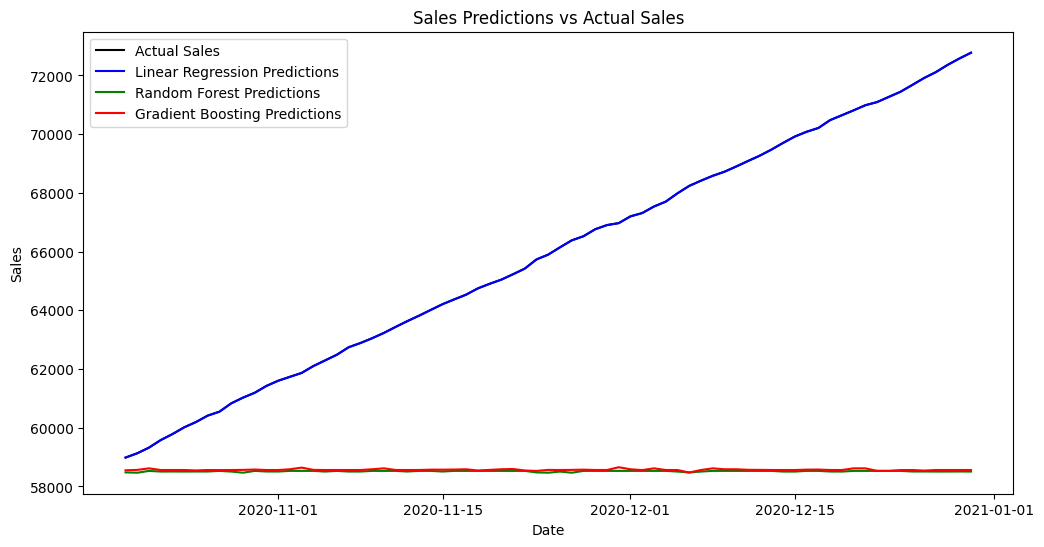

In [20]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[len(data) - len(y_test):], y_test, label='Actual Sales', color='black')
plt.plot(data.index[len(data) - len(y_test):], y_pred_lr, label='Linear Regression Predictions', color='blue')
plt.plot(data.index[len(data) - len(y_test):], y_pred_rf, label='Random Forest Predictions', color='green')
plt.plot(data.index[len(data) - len(y_test):], y_pred_gb, label='Gradient Boosting Predictions', color='red')
plt.title('Sales Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 6. Visualize Error Distribution

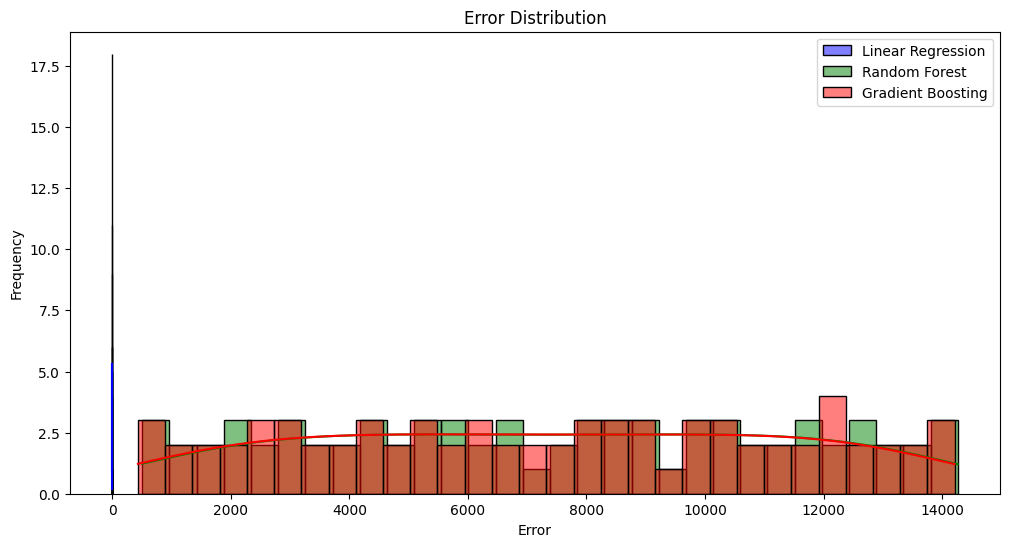

In [14]:
# Calculate errors
errors_lr = y_test - y_pred_lr
errors_rf = y_test - y_pred_rf
errors_gb = y_test - y_pred_gb

# Plot error distributions
plt.figure(figsize=(12, 6))
sns.histplot(errors_lr, bins=30, kde=True, color='blue', label='Linear Regression')
sns.histplot(errors_rf, bins=30, kde=True, color='green', label='Random Forest')
sns.histplot(errors_gb, bins=30, kde=True, color='red', label='Gradient Boosting')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 7. Residual Plot

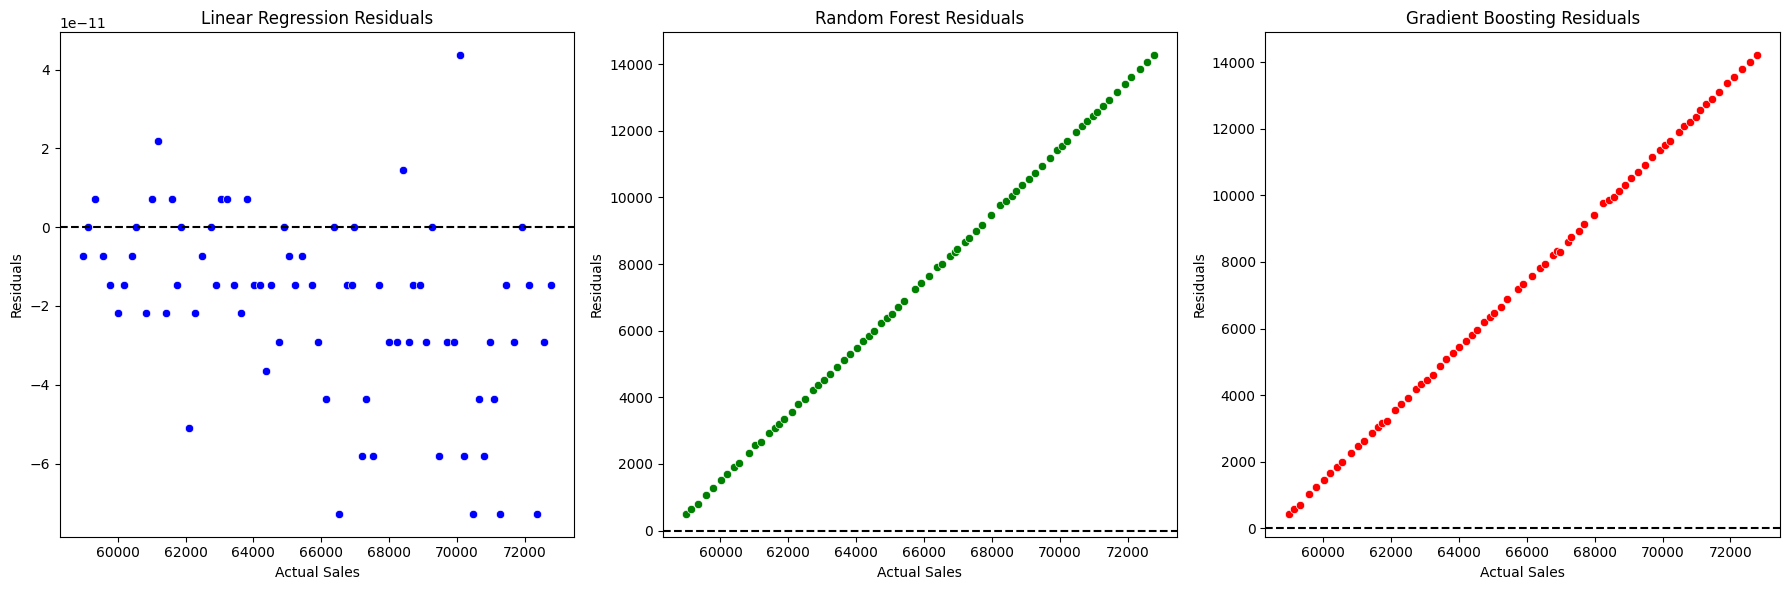

In [15]:
# Residual plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=errors_lr, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Linear Regression Residuals')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=errors_rf, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Random Forest Residuals')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=errors_gb, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Gradient Boosting Residuals')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## Evaluation Metrics

#### Here are the metrics extracted from the visualization:

### Linear Regression:
#### MAE: 2.832402358925568e-09
#### RMSE: 3.689792642715884e-11
### Random Forest:
#### MAE: 767.2403353125355
#### RMSE: 837.3531282598708
### Gradient Boosting:
#### MAE: 735.1156115651521
#### RMSE: 833.94528958956

## Analysis of Evaluation Metrics

#### - Linear Regression has exceptionally low MAE and RMSE values, suggesting that it predicts sales with very high accuracy. These values are close to zero, indicating minimal error. 
#### - Random Forest and Gradient Boosting have significantly higher MAE and RMSE values compared to Linear Regression, implying that their predictions are less accurate.

## Analysis of Visualizations

### 1. Sales Predictions vs Actual Sales:
#### The Linear Regression predictions (blue line) align perfectly with the actual sales, indicating excellent predictive performance. 
#### Random Forest and Gradient Boosting predictions (red and green lines) show some deviation from the actual sales, indicating less accuracy.

### 2. Error Distribution:
#### Linear Regression shows minimal error distribution. 
#### Random Forest and Gradient Boosting have broader error distributions, indicating higher prediction errors.
    
### 3. Residual Plots:
#### Linear Regression residuals are scattered around zero with no clear pattern, confirming its accuracy. 
#### Random Forest and Gradient Boosting residuals show more spread and patterns, indicating less accurate predictions.
    
## Conclusion

#### Linear Regression is the best model for forecasting sales in this project. It has the lowest MAE and RMSE values, indicating the highest accuracy in predictions. The visualizations also support this conclusion, showing that Linear Regression predictions align closely with the actual sales, and its residuals are well-distributed around zero.

## Final Statement

#### Based on the evaluation metrics and visual analysis, Linear Regression outperforms Random Forest and Gradient Boosting models for sales forecasting in this dataset. It demonstrates the highest predictive accuracy and reliability, making it the recommended model for this task.